In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


/home/aaron/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
train_data = pd.read_csv('train_data.csv',index_col = 0)
test_kaggle = pd.read_csv('test_kaggle.csv',index_col=0)

In [41]:
features = ['periodo', 'ad campaign hit_mean',
       'brand listing_mean', 'checkout_mean', 'conversion_mean',
       'generic listing_mean', 'lead_mean', 'search engine hit_mean',
       'searched products_mean', 'staticpage_mean', 'viewed product_mean',
       'visited site_mean', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean']

In [42]:
X = train_data[features]
Y = train_data['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [43]:
dmatrix = xgb.DMatrix(data=train_data[features],label=train_data['label'],feature_names=features)

In [63]:
xgbClassifier = xgb.XGBRegressor(objective='binary:logistic',colsample_bytree=0.4,
                 gamma=0,
                 max_delta_step=0,
                 learning_rate=0.01,
                 max_depth=6,
                 min_child_weight=1.0,
                 n_estimators=100,           
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.75,
                 seed=42)


In [64]:
params = {'objective':'binary:logistic','colsample_bytree': 0.5, 'learning_rate': 1.0,
                'max_depth' : 10, 'n_estimators' : 20,'seed':123}

xgb.cv(dtrain=dmatrix,params=params)

[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=8
[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=10
[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=10
[19:55:43] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=10
[19:55:43] /opt/conda/conda-bld/

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.048032,0.001225,0.053003,0.003162
1,0.046693,0.001480,0.056866,0.005789
2,0.042392,0.002184,0.059390,0.006869
3,0.038375,0.002565,0.060318,0.003102
4,0.033017,0.002546,0.061090,0.005201
5,0.029978,0.002032,0.060472,0.004102
6,0.026656,0.002747,0.060420,0.004214
7,0.023488,0.002599,0.060935,0.004069
8,0.019033,0.001607,0.061039,0.005304
9,0.016612,0.001061,0.061296,0.004671


In [65]:
xgbClassifier.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.0, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.75)

In [66]:
xgbClassifier.score(X_test,Y_test)

-0.5058790716959296

In [67]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=10
[19:56:10] /opt/conda/conda-

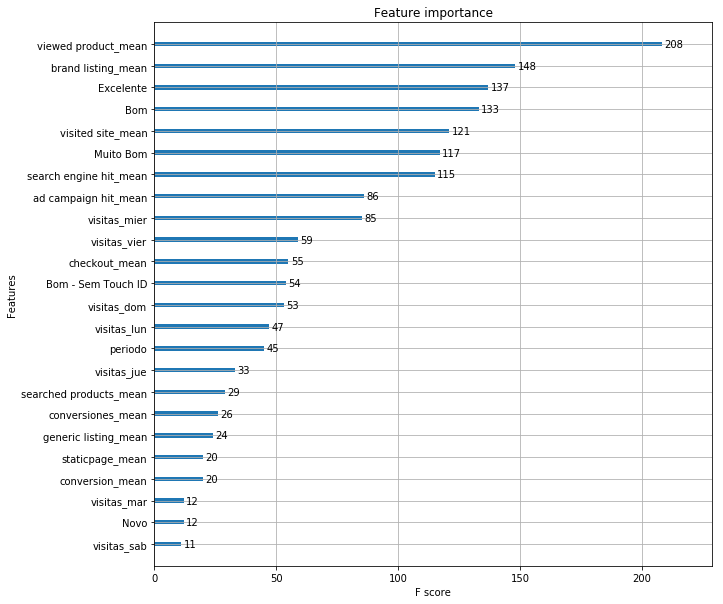

In [68]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Test Kaggle

In [69]:
test_kaggle['prediction'] = xgbClassifier.predict(test_kaggle[features])

In [70]:
submit_kaggle = pd.DataFrame({'person':test_kaggle['person'],'label':test_kaggle['prediction']})

In [72]:
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 0.0 if x < 0.0 else x)

In [73]:
submit_kaggle.reset_index(inplace = True)
submit_kaggle.drop(columns='index',inplace=True)
submit_kaggle.set_index(keys='person',inplace=True)

In [74]:
submit_kaggle

,label
person,
4886f805,0.200894
0297fc1e,0.225632
2d681dd8,0.203458
cccea85e,0.221069
4c8a8b93,0.214719
29ebb414,0.202288
3dc1950f,0.232677
8ea4c165,0.217726
d8cfe234,0.224459


In [75]:
submit_kaggle.to_csv('submit_kaggle.csv')